In [1]:
import datetime as dt
import pandas as pd
import matplotlib.pyplot as plt
import ipywidgets as widgets
from matplotlib_venn import venn2 # install with pip install matplotlib-venn
import pandas_datareader # install with `pip install pandas-datareader`
import pydst # install with `pip install git+https://github.com/elben10/pydst`


In [2]:
imptrade = pd.read_excel('tradequartelydata.xlsx', skiprows = 2)
imptrade

,Unnamed: 0,Unnamed: 1,Unnamed: 2,2005Q1,2005Q2,2005Q3,2005Q4,2006Q1,2006Q2,2006Q3,...,2017Q3,2017Q4,2018Q1,2018Q2,2018Q3,2018Q4,2019Q1,2019Q2,2019Q3,2019Q4
0,Seasonally adjusted,TOTAL,Imports,100780.7,108258.6,111117.2,115172.8,118755.5,125171.5,124217.8,...,153379.3,156774.9,157952.0,168891.8,156357.6,159367.4,161654.7,162107.0,164108.7,160200.6
1,NaN,NaN,Exports,118030.5,120214.0,125137.3,128342.0,131753.4,133784.8,133818.4,...,167193.0,169750.9,167581.7,168983.5,172967.3,177985.3,178046.6,183961.5,186049.6,186672.9


In [3]:
drops = ['Unnamed: 0', 'Unnamed: 1']
imptrade.drop(drops, axis=1, inplace=True) # axis = 1 -> columns, inplace=True -> changed, no copy made
imptrade.rename(columns = {'Unnamed: 2':'Flow'}, inplace=True)
imptrade.loc[imptrade.Flow == 'Imports', 'Flow'] = 'Goods imports'
imptrade.loc[imptrade.Flow == 'Exports', 'Flow'] = 'Goods exports'
imptrade

,Flow,2005Q1,2005Q2,2005Q3,2005Q4,2006Q1,2006Q2,2006Q3,2006Q4,2007Q1,...,2017Q3,2017Q4,2018Q1,2018Q2,2018Q3,2018Q4,2019Q1,2019Q2,2019Q3,2019Q4
0,Goods imports,100780.7,108258.6,111117.2,115172.8,118755.5,125171.5,124217.8,131485.8,132655.7,...,153379.3,156774.9,157952.0,168891.8,156357.6,159367.4,161654.7,162107.0,164108.7,160200.6
1,Goods exports,118030.5,120214.0,125137.3,128342.0,131753.4,133784.8,133818.4,140279.9,136893.3,...,167193.0,169750.9,167581.7,168983.5,172967.3,177985.3,178046.6,183961.5,186049.6,186672.9


In [4]:
impserv = pd.read_excel('servicegoodstot.xlsx', skiprows = 2)
impserv

,Unnamed: 0,Unnamed: 1,Unnamed: 2,2005Q1,2005Q2,2005Q3,2005Q4,2006Q1,2006Q2,2006Q3,...,2017Q3,2017Q4,2018Q1,2018Q2,2018Q3,2018Q4,2019Q1,2019Q2,2019Q3,2019Q4
0,Seasonally adjusted,SERVICES,Imports,53873,55723,58403,62834,63327,68350,71284,...,103696,106392,108619,113702,112731,114222,112849,117888,118426,125688
1,NaN,NaN,Exports,62445,65853,65887,69132,72395,77983,79840,...,114083,115393,121062,122581,124441,126171,118948,123974,126357,128466


In [5]:
drops = ['Unnamed: 0', 'Unnamed: 1']
impserv.drop(drops, axis=1, inplace=True) # axis = 1 -> columns, inplace=True -> changed, no copy made
impserv.rename(columns = {'Unnamed: 2':'Flow'}, inplace=True)
impserv

,Flow,2005Q1,2005Q2,2005Q3,2005Q4,2006Q1,2006Q2,2006Q3,2006Q4,2007Q1,...,2017Q3,2017Q4,2018Q1,2018Q2,2018Q3,2018Q4,2019Q1,2019Q2,2019Q3,2019Q4
0,Imports,53873,55723,58403,62834,63327,68350,71284,76583,75128,...,103696,106392,108619,113702,112731,114222,112849,117888,118426,125688
1,Exports,62445,65853,65887,69132,72395,77983,79840,84795,82724,...,114083,115393,121062,122581,124441,126171,118948,123974,126357,128466


In [6]:
impserv.loc[impserv.Flow == 'Imports', 'Flow'] = 'Services imports'
impserv.loc[impserv.Flow == 'Exports', 'Flow'] = 'Services exports'
impserv

,Flow,2005Q1,2005Q2,2005Q3,2005Q4,2006Q1,2006Q2,2006Q3,2006Q4,2007Q1,...,2017Q3,2017Q4,2018Q1,2018Q2,2018Q3,2018Q4,2019Q1,2019Q2,2019Q3,2019Q4
0,Services imports,53873,55723,58403,62834,63327,68350,71284,76583,75128,...,103696,106392,108619,113702,112731,114222,112849,117888,118426,125688
1,Services exports,62445,65853,65887,69132,72395,77983,79840,84795,82724,...,114083,115393,121062,122581,124441,126171,118948,123974,126357,128466


In [7]:
inter_trade = pd.concat([imptrade,impserv], axis=0, ignore_index=True)              
inter_trade


,Flow,2005Q1,2005Q2,2005Q3,2005Q4,2006Q1,2006Q2,2006Q3,2006Q4,2007Q1,...,2017Q3,2017Q4,2018Q1,2018Q2,2018Q3,2018Q4,2019Q1,2019Q2,2019Q3,2019Q4
0,Goods imports,100780.7,108258.6,111117.2,115172.8,118755.5,125171.5,124217.8,131485.8,132655.7,...,153379.3,156774.9,157952.0,168891.8,156357.6,159367.4,161654.7,162107.0,164108.7,160200.6
1,Goods exports,118030.5,120214.0,125137.3,128342.0,131753.4,133784.8,133818.4,140279.9,136893.3,...,167193.0,169750.9,167581.7,168983.5,172967.3,177985.3,178046.6,183961.5,186049.6,186672.9
2,Services imports,53873.0,55723.0,58403.0,62834.0,63327.0,68350.0,71284.0,76583.0,75128.0,...,103696.0,106392.0,108619.0,113702.0,112731.0,114222.0,112849.0,117888.0,118426.0,125688.0
3,Services exports,62445.0,65853.0,65887.0,69132.0,72395.0,77983.0,79840.0,84795.0,82724.0,...,114083.0,115393.0,121062.0,122581.0,124441.0,126171.0,118948.0,123974.0,126357.0,128466.0


In [8]:
int_tran = inter_trade.set_index('Flow').T
int_tran.index = pd.to_datetime(int_tran.index)
del int_tran.index.name
int_tran
int_tran['total_exports'] = int_tran['Goods exports']+int_tran['Services exports']
int_tran['total_imports'] = int_tran['Goods imports']+int_tran['Services imports']
int_tran['balance_of_trade'] = int_tran['total_exports']-int_tran['total_imports']

int_tran

Flow,Goods imports,Goods exports,Services imports,Services exports,total_exports,total_imports,balance_of_trade
2005-01-01,100780.7,118030.5,53873.0,62445.0,180475.5,154653.7,25821.8
2005-04-01,108258.6,120214.0,55723.0,65853.0,186067.0,163981.6,22085.4
2005-07-01,111117.2,125137.3,58403.0,65887.0,191024.3,169520.2,21504.1
2005-10-01,115172.8,128342.0,62834.0,69132.0,197474.0,178006.8,19467.2
2006-01-01,118755.5,131753.4,63327.0,72395.0,204148.4,182082.5,22065.9
2006-04-01,125171.5,133784.8,68350.0,77983.0,211767.8,193521.5,18246.3
2006-07-01,124217.8,133818.4,71284.0,79840.0,213658.4,195501.8,18156.6
2006-10-01,131485.8,140279.9,76583.0,84795.0,225074.9,208068.8,17006.1
2007-01-01,132655.7,136893.3,75128.0,82724.0,219617.3,207783.7,11833.6
2007-04-01,131990.6,136641.1,76456.0,82938.0,219579.1,208446.6,11132.5


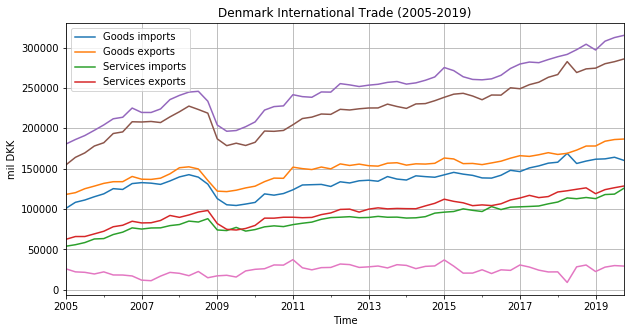

In [9]:
fig1 = int_tran.plot(figsize=(10,5))
plt.title('Denmark International Trade (2005-2019)')
plt.xlabel('Time')
plt.ylabel('mil DKK')
plt.legend(['Goods imports', 'Goods exports', 'Services imports', 'Services exports'], loc=2)
plt.grid(True)
plt.show()

As we can notice from the figure above Denmark has a bigger exchange of goods with respect to services. During the last 15 years for both goods and services the trend has been positive. The only oddity is represented by the year 2009 where both imports and exports have suffered a drastic collapse evidently due to the great global recession. From the graph we can also deduct that net balance for Denmark has been positive for the last 15 years with an overall better result for the commercial goods trade.

In [10]:
trade_part = pd.read_excel('tradecountries.xlsx', skiprows = [0,1,3,14])
to_drop = ['Unnamed: 0']
trade_part.drop(to_drop, axis=1, inplace=True) # axis = 1 -> columns, inplace=True -> changed, no copy made
trade_part.rename(columns = {'Unnamed: 1':'impexp','Unnamed: 2':'Country'}, inplace=True)
d = {'Imports (excl. vessels and aircraft, fuels etc.)':'Imports','Exports (excl. vessels and aircraft, fuels etc.)':'Exports'}
trade_party = trade_part.replace(d)
trade_party

,impexp,Country,1997M01,1997M02,1997M03,1997M04,1997M05,1997M06,1997M07,1997M08,...,2019M04,2019M05,2019M06,2019M07,2019M08,2019M09,2019M10,2019M11,2019M12,2020M01
0,Imports,EU,17214.4,16834.3,16989.7,17155.1,16641.8,17262.4,17205.8,17707.8,...,36307.3,36484.7,37554.4,37104.8,37195.5,36842.8,35793.9,36117.2,35871.7,36163.8
1,Imports,Germany,5231.7,5201.5,5597.4,5092.6,4840.2,5236.6,5229.9,5300.2,...,11226.8,11543.7,11592.0,11882.0,12191.4,11189.6,10982.0,10869.6,10671.6,10911.8
2,Imports,Sweden,2846.6,2747.4,2718.1,2721.5,2765.5,2800.6,2756.7,2952.9,...,6052.5,5939.3,6052.0,6157.2,6038.1,6131.2,5956.7,5897.6,5967.3,5921.8
3,Imports,United Kingdom,1681.3,1699.0,1723.5,1817.2,1757.9,1780.6,1696.8,1749.0,...,1755.3,1759.4,1872.1,1849.9,1745.1,1816.3,1920.6,1856.7,1783.2,1808.6
4,Imports,Netherlands,1721.5,1686.6,1741.6,1839.2,1823.0,1922.4,1913.0,1944.5,...,4060.3,4163.8,4029.8,4052.2,4144.3,4208.6,4061.8,4139.7,4022.0,3960.2
5,Imports,France,1281.2,1213.3,1171.4,1202.5,1238.8,1340.5,1397.4,1297.1,...,1650.9,1690.4,1724.3,1716.5,1713.3,1643.1,1610.2,1599.5,1616.1,1576.7
6,Imports,World outside EU,5355.5,5201.2,5211.6,5597.4,5343.8,5199.0,5402.7,5419.2,...,12591.5,12988.9,12808.3,13395.9,12571.8,12826.4,13169.3,12804.7,11382.3,13320.4
7,Imports,Norway,786.9,726.5,736.6,762.7,734.5,724.8,784.2,727.6,...,1344.8,1390.8,1329.3,1394.9,1406.2,1563.5,1429.6,1335.4,1372.9,1486.0
8,Imports,USA,1160.4,1117.3,988.5,1193.7,1095.2,989.2,1106.6,1073.4,...,1355.6,1734.3,1256.4,1469.5,1442.9,1335.5,1558.5,1358.6,1039.9,1650.7
9,Imports,China,420.9,415.9,473.1,511.8,516.4,487.7,495.1,547.0,...,3935.4,4021.0,4011.1,3975.9,3730.0,3821.7,3981.6,3474.5,3682.5,3805.9


In [11]:
trade_partyy = trade_party.loc[trade_party['impexp'] == 'Exports']
to_drp = ['impexp']
trade_partyy.drop(to_drp, axis=1, inplace=True)
trade_partyy

C:\Users\maria\Anaconda3\lib\site-packages\pandas\core\frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,Country,1997M01,1997M02,1997M03,1997M04,1997M05,1997M06,1997M07,1997M08,1997M09,...,2019M04,2019M05,2019M06,2019M07,2019M08,2019M09,2019M10,2019M11,2019M12,2020M01
10,EU,16544.3,16713.8,17028.7,17283.9,17360.7,17456.9,16852.7,17191.2,17241.5,...,32663.0,33059.1,32904.2,33269.3,34457.5,32406.4,32274.1,33473.2,31627.7,33627.9
11,Germany,5483.6,5519.0,5429.6,5625.5,5454.6,5567.3,5417.6,5367.5,5356.0,...,9103.5,8899.9,9034.0,8683.6,9269.8,8402.2,7807.6,8028.3,7872.5,8443.6
12,Sweden,2531.0,2439.4,2554.8,2566.2,2542.9,2629.0,2516.3,2640.1,2604.3,...,5402.9,5304.3,5475.5,5444.4,5541.8,5388.7,5211.2,5283.6,5218.7,5501.0
13,United Kingdom,2054.4,2109.0,2125.7,2217.3,2260.3,2302.0,2242.3,2303.9,2373.2,...,3229.6,3105.7,3467.1,3406.9,3549.8,3105.0,3280.6,3649.7,3699.8,3084.6
14,Netherlands,1031.4,1047.5,1045.2,1130.2,1114.3,1075.9,1112.9,1126.7,1121.2,...,2568.3,2398.0,2830.2,2517.5,3172.2,2575.9,2738.5,2779.2,2437.5,3723.1
15,France,1354.4,1303.7,1399.5,1376.7,1580.8,1334.4,1388.5,1363.4,1358.5,...,2099.3,2071.0,2191.4,2092.9,2175.2,2268.3,2173.0,2215.9,2191.6,2281.5
16,World outside EU,7579.2,7885.2,8220.5,7936.4,7791.6,8127.2,7977.4,8227.8,8145.8,...,24011.4,26434.2,24733.9,25936.8,26391.4,26534.0,27104.3,26178.0,26108.9,27156.8
17,Norway,1460.7,1521.5,1683.5,1463.8,1543.9,1527.9,1589.3,1505.5,1582.5,...,3667.7,3917.4,3634.4,4115.8,3846.3,3577.3,3562.8,3269.3,3585.1,3763.7
18,USA,1061.3,1055.4,1093.8,1030.7,1108.5,1095.7,1054.3,1209.7,1132.1,...,5271.3,7299.6,6058.2,5876.2,7557.2,6693.0,7715.0,7391.2,6775.0,6514.1
19,China,126.0,93.2,210.2,203.2,228.5,307.9,204.8,327.6,160.4,...,3284.2,2876.5,2249.9,2801.5,2985.2,3472.1,3347.4,3636.7,3764.2,3460.7


In [12]:
trade_partyy.set_index('Country',inplace=True)
trade_partyy.index.name = None
trade_trasp = trade_partyy.transpose()
trade_trasp.index.name = 'Date'
tr = trade_trasp.iloc[96:]
tr.reset_index(inplace=True)


In [13]:
int_tran1 = int_tran.copy()
int_tran1['total_exports'] = int_tran1['Goods exports']+int_tran1['Services exports']
int_tran1['total_imports'] = int_tran1['Goods imports']+int_tran1['Services imports']
int_tran1['balance_of_trade'] = int_tran1['total_exports']-int_tran1['total_imports']

int_tran1



Flow,Goods imports,Goods exports,Services imports,Services exports,total_exports,total_imports,balance_of_trade
2005-01-01,100780.7,118030.5,53873.0,62445.0,180475.5,154653.7,25821.8
2005-04-01,108258.6,120214.0,55723.0,65853.0,186067.0,163981.6,22085.4
2005-07-01,111117.2,125137.3,58403.0,65887.0,191024.3,169520.2,21504.1
2005-10-01,115172.8,128342.0,62834.0,69132.0,197474.0,178006.8,19467.2
2006-01-01,118755.5,131753.4,63327.0,72395.0,204148.4,182082.5,22065.9
2006-04-01,125171.5,133784.8,68350.0,77983.0,211767.8,193521.5,18246.3
2006-07-01,124217.8,133818.4,71284.0,79840.0,213658.4,195501.8,18156.6
2006-10-01,131485.8,140279.9,76583.0,84795.0,225074.9,208068.8,17006.1
2007-01-01,132655.7,136893.3,75128.0,82724.0,219617.3,207783.7,11833.6
2007-04-01,131990.6,136641.1,76456.0,82938.0,219579.1,208446.6,11132.5


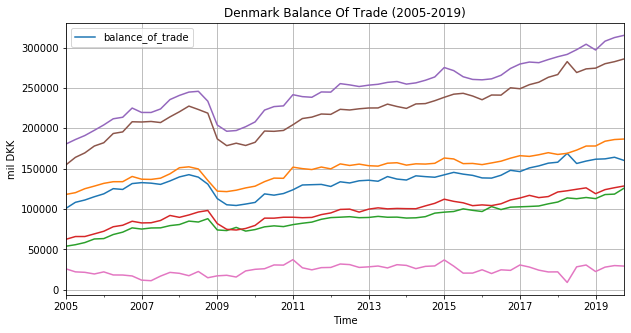

In [14]:
fig1 = int_tran1.plot(figsize=(10,5))
plt.title('Denmark Balance Of Trade (2005-2019)')
plt.xlabel('Time')
plt.ylabel('mil DKK')
plt.legend(['balance_of_trade'], loc=2)
plt.grid(True)
plt.show()